<a id = "intro"></a>

# <u>1. Introduction</u>

For this analysis, we use data pertaining to the red wine variants of the Portuguese "Vinho Verde" wine which was obtained from the popular online data science and machine learning community [Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) and is also available for download from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality). The data come from a research paper by Cortez et al., 2009 which aimed to model wine quality based on physicochemical tests. The variables in the data are:
1. Fixed Acidity
2. Volatile Acidity
3. Citric Acid
4. Residual Sugar
5. Chlorides
6. Free Sulfur Dioxide
7. Total Sulfur Dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol
12. Quality

The aim for our analysis is to assess how well different classification algorithms perform at predicting whether each wine in the dataset is "Good" quality or "Bad" quality based on the first 11 variables from the list above. 

The following analysis contains intial data descriptions in [Section 2.1](#IDI) followed by exploratory data analysis in [Section 3](#eda). Data Pre-processing is carried out in [Section 4](#PrePro) before fitting our classification methods in [Section 5](#ClassMethods), with concluding remarks provided in [Section 6](#conc).

<a id = "lib_data"></a>
# <u>2. Library & Data Imports</u>

In [23]:
# Initial libraries to be used for data exploration
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Libraries used for some data cleaning/pre-processing
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler

# Library for Train & Test Split
from sklearn.model_selection import train_test_split

# Libraries for Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Libraries for performance assessment
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
# Import the data
df = pd.read_csv("winequality-red.csv")

<a id = "IDI"></a>
##  <u>2.1 - Initial Data Information</u>

We begin by looking at the first 5 rows of the dataset below to get an idea of how the data are looking and on what scale each variable appears to be on

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


It seems as though the variables citric acid and chlorides are on a very small scale (close to 0) relative to the likes of free & total sulfur dioxide. Below we can look at the count of the data along with the data types of each variable in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


From the above output, it appears as though we have 1,599 wine observations in our data with all columns except our output variable containing floating point numbers where the output variable quality contains integers. We can also gain an initial rough understanding of how the data are spread via the output below

In [5]:
df.describe().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


We can see that some variables, namely residual sugar, free sulfur dioxide and total sulfur dioxide have minimum values and maximum values that are significantly different which could suggest we may have to deal with some skews in the data. 
The final step for this section is to assess whether we are dealing with any missing values in the dataset which as we can see from the output below, we don't need to be worried about any missing data.

In [6]:
pd.DataFrame(df.isnull().sum()).rename(columns = {0: "Missing Value Count"})

,Missing Value Count
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


<a id = "eda"></a>
# <u>3. Exploratory Analysis</u>

For this section of the analysis, we'll explore the data in some more detail covering some univariate analysis to assess how the data are distributed followed by bivariate analysis to assess correlations and the relationship between each predictor and the output variable quality.

<a id = "UA"></a>
## <u>3.1 - Univariate Analysis</u>

The first plot we'll examine in this section is a countplot which shows the number of wines in our dataset for each quality category.

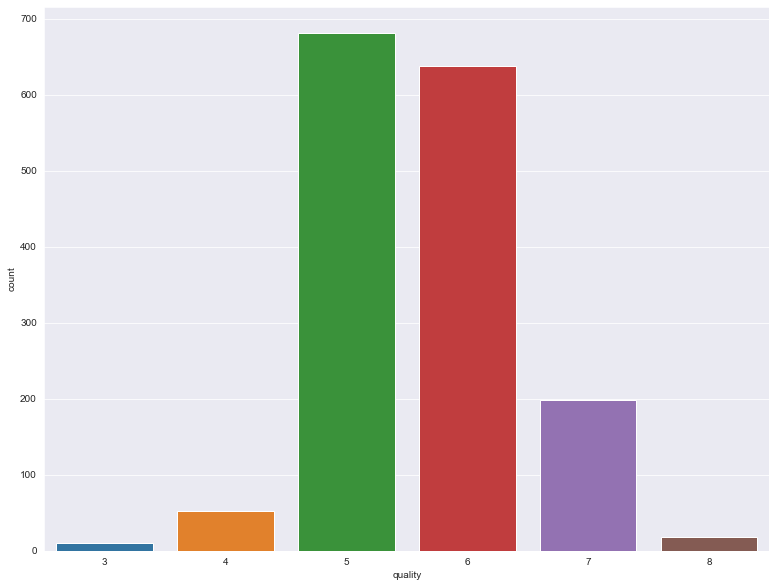

In [27]:
plt.figure(figsize = (13, 10))
sns.set_style("darkgrid")

sns.countplot(x = "quality", data = df);

As we can see from the countplot, there are much less wines in the dataset that are classed as being a quality of 3, 4, 7 or 8 compared to the number of wines classed as being a quality of 5 or 6. We could look at this as saying there are many more wines classed as average compared to wines classed as either very poor or very good.

The table below demonstrates this with there only being 10 & 53 wines with a quality of 3 & 4 respectively and only 18 wines with the best quality of 8. There is significantly more wines with a quality rating of 7 compared to the lowest 3 groups but this is still some way behind the number of wines classed as being a quality of 5 or 6

In [17]:
pd.DataFrame(df["quality"].value_counts()).sort_index().rename(columns = {"quality": "Count"})

,Count
3,10
4,53
5,681
6,638
7,199
8,18


We can now look at how each predictor in the dataset is distributed by examining distribution plots and this will give us an understanding of whether we need to deal with any skewed data 

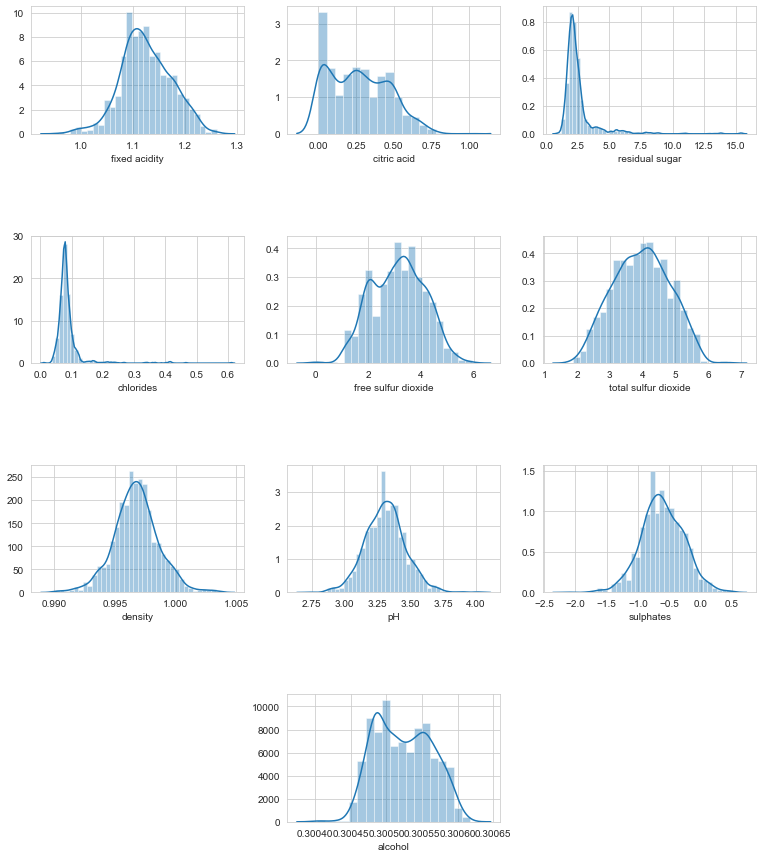

In [28]:
plt.figure(figsize = (13,15))
plt.subplots_adjust(hspace = 0.8)
sns.set_style("whitegrid")

plt.subplot(4, 3, 1)
sns.distplot(df["fixed acidity"]);
plt.subplot(4, 3, 2)
sns.distplot(df["citric acid"]);
plt.subplot(4, 3, 3)
sns.distplot(df["residual sugar"]);
plt.subplot(4, 3, 4)
sns.distplot(df["chlorides"]);
plt.subplot(4, 3, 5)
sns.distplot(df["free sulfur dioxide"]);
plt.subplot(4, 3, 6)
sns.distplot(df["total sulfur dioxide"]);
plt.subplot(4, 3, 7)
sns.distplot(df["density"]);
plt.subplot(4, 3, 8)
sns.distplot(df["pH"]);
plt.subplot(4, 3, 9)
sns.distplot(df["sulphates"]);
plt.subplot(4, 3, 11)
sns.distplot(df["alcohol"]);


As is pretty evident from the distribution plots above, quite a number of variables have some skew to varying degrees. Namely those variables that will need to be dealt with are fixed acidity, free & total sulfur dioxide, sulphates & alcohol.

All these contain right-skews so a transformation such as a Logarithmic or Box-Cox transformation would be appropriate in this case. Another alternative would be to assess for outliers in the data and simply remove them however in doing so we lose information in the data and the dataset isn't particularly large to begin with.

In this scenario we'll apply a Box-Cox transformation but beforehand we'll also look at the QQ-plots of the variables of interest to assess how close the variables' distribution is to the Normal distribution before and after the transformation

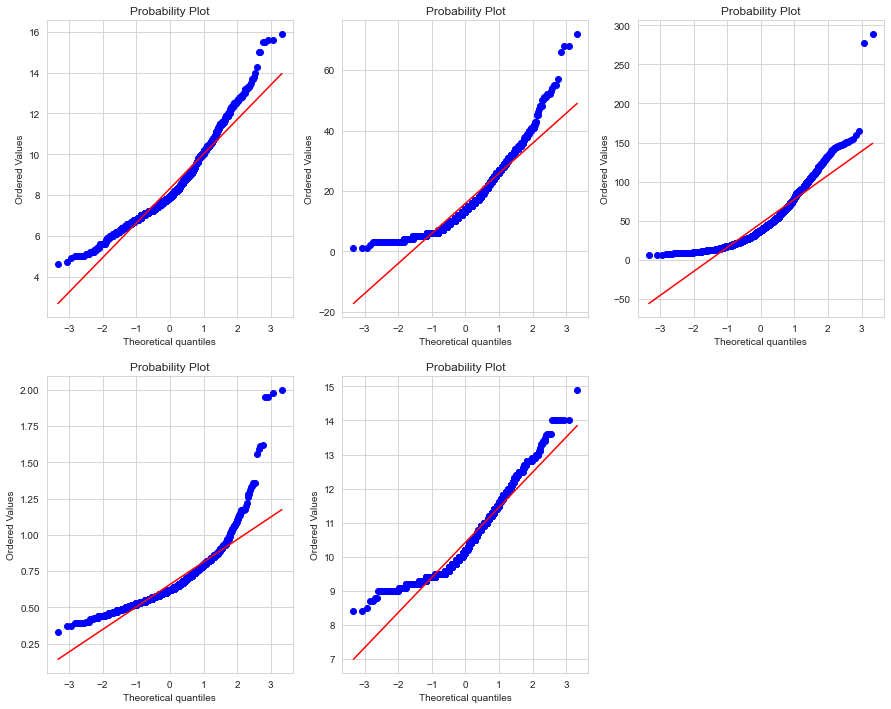

In [30]:
plt.figure(figsize = (15,12))
sns.set_style("whitegrid")

plt.subplot(2, 3, 1)
stats.probplot(df["fixed acidity"], dist = "norm", plot = plt);
plt.subplot(2, 3, 2)
stats.probplot(df["free sulfur dioxide"], dist = "norm", plot = plt);
plt.subplot(2, 3, 3)
stats.probplot(df["total sulfur dioxide"], dist = "norm", plot = plt);
plt.subplot(2, 3, 4)
stats.probplot(df["sulphates"], dist = "norm", plot = plt);
plt.subplot(2, 3, 5)
stats.probplot(df["alcohol"], dist = "norm", plot = plt);

From the QQ-plot, we want the blue points to lie on the line to suggest the data are normally distributed and this seems to be the case for the middle portion of the data but the extremes appear to deviate from the line.

To try correct this, we'll apply the transformation in the cell below and re-assess these plots to see any differences

In [27]:
df["fixed acidity"], best_lambda1 = stats.boxcox(df["fixed acidity"])
df["free sulfur dioxide"], best_lambda2 = stats.boxcox(df["free sulfur dioxide"])
df["total sulfur dioxide"], best_lambda3 = stats.boxcox(df["total sulfur dioxide"])
df["sulphates"], best_lambda4 = stats.boxcox(df["sulphates"])
df["alcohol"], best_lambda5 = stats.boxcox(df["alcohol"])

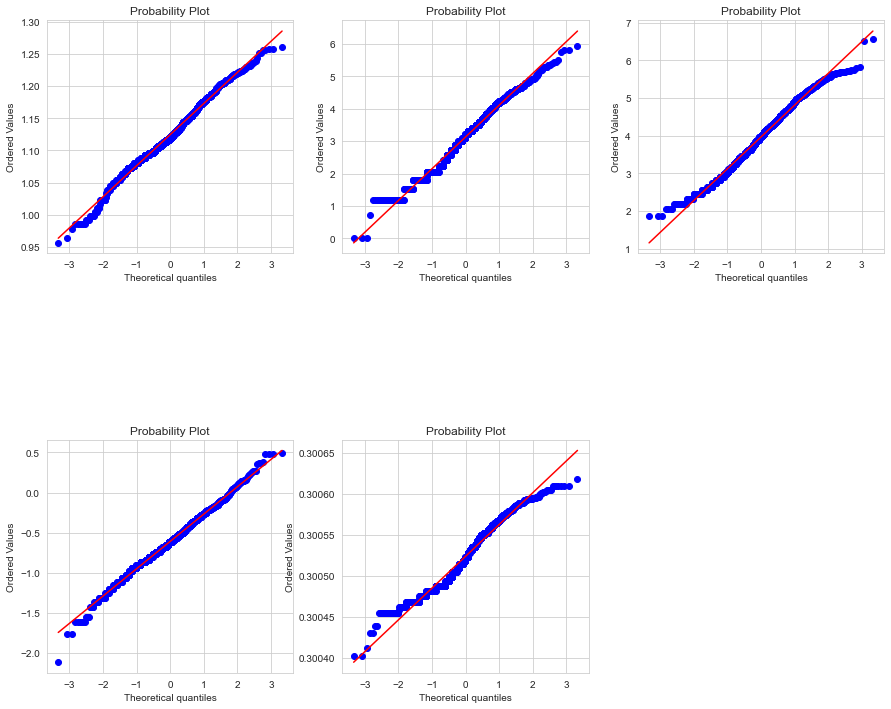

In [32]:
plt.figure(figsize = (15,12))
plt.subplots_adjust(hspace = 0.8)
sns.set_style("whitegrid")

plt.subplot(2, 3, 1)
stats.probplot(df["fixed acidity"], dist = "norm", plot = plt);
plt.subplot(2, 3, 2)
stats.probplot(df["free sulfur dioxide"], dist = "norm", plot = plt);
plt.subplot(2, 3, 3)
stats.probplot(df["total sulfur dioxide"], dist = "norm", plot = plt);
plt.subplot(2, 3, 4)
stats.probplot(df["sulphates"], dist = "norm", plot = plt);
plt.subplot(2, 3, 5)
stats.probplot(df["alcohol"], dist = "norm", plot = plt);

It appears as though the Box-Cox transformation has done substantially well at correcting the distributions of the variables and although we do still see some slight deviation at the extremes, it has overall done a good job.

<a id = "BA"></a>
## <u>3.2 - Bivariate Analysis</u>

Now we've taken care of the data distributions, we look to explore how the relationships look between each of the variables. The plot below is a simple heatmap of the correlations between each variable,

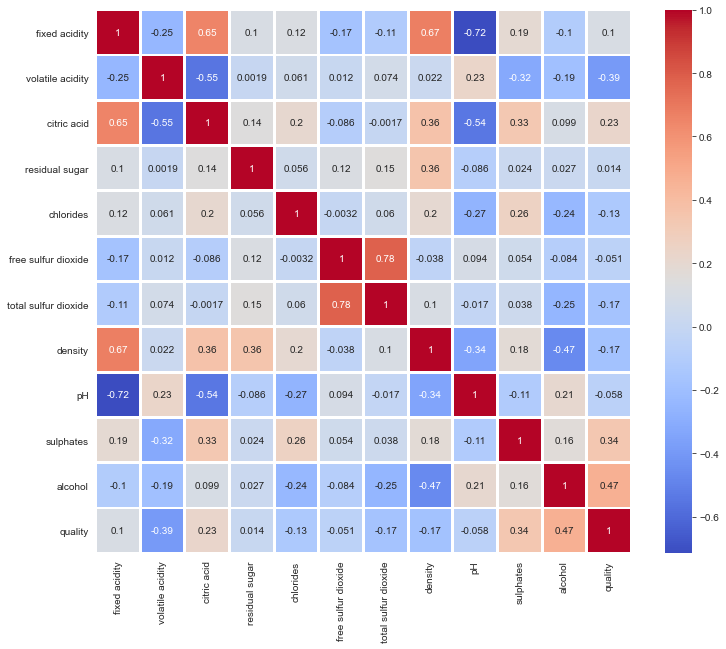

In [34]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm", linewidths = 2,);

We can observe quite a couple of strong correlations from the heatmap:

<u> 1. pH & Fixed Acidity / pH & Citric Acid:</u> 

The correlations that pH has with both fixed acidity and citric acid are both negative with the correlation with fixed acidity being strongly negative. We would expect to see this because of chemistry since as the pH begins to rise, acidity falls and vice-versa.


<u> 2. Free Sulfur Dioxide & Total Sulfur Dioxide</u>

We see a very strong positive correlation between these two variables which again, we would expect to see since total sulfur dioxide is composed of both free and bound sulfur dioxide.


<u> 3. Fixed Acidity & Density / Fixed Acidity & Citric Acid</u>

We also see strong correlations with fixed acidity and density, citric acid. It does appear logical to come to the solution that as the fixed acidity of a wine is increased (ie. the acids that dont evaporate easily), the density of a wine would increase. Similarly, as citric acid is added to a wine, we would expect the wines' acidity to also increase.

More moderate correlations can also be observed with the likes of alcohol and density and the quality of a wine having a moderately strong positive correlation with alcohol.

We can now begin to look at the relationship between the predictors in the dataset and the quality variable. The plots below demonstrate 

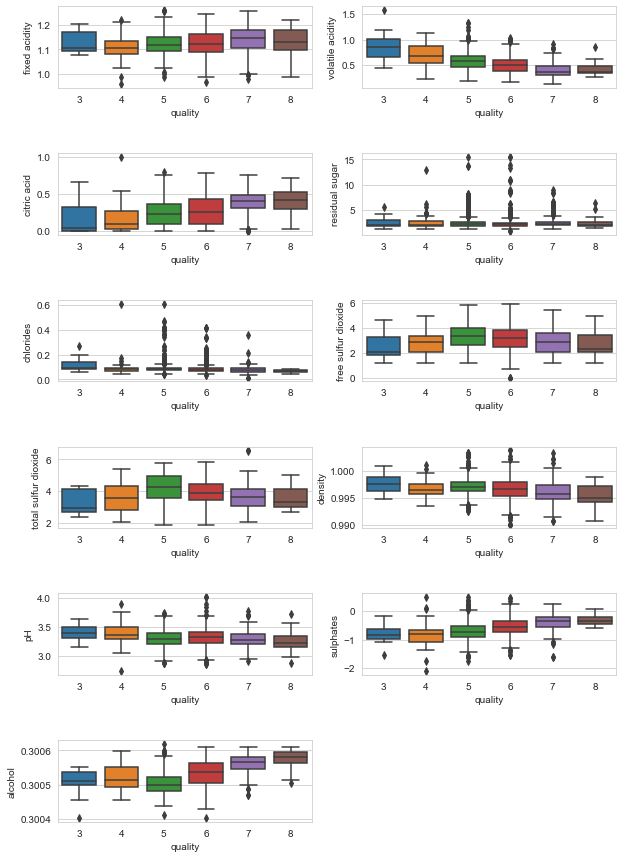

In [46]:
plt.figure(figsize = (10, 15))
plt.subplots_adjust(hspace = 0.8)
sns.set_style("whitegrid")
       
plt.subplot(6, 2, 1)
sns.boxplot(x = "quality", y = "fixed acidity", data = df)

plt.subplot(6, 2, 2)
sns.boxplot(x = "quality", y = "volatile acidity", data = df)

plt.subplot(6, 2, 3)
sns.boxplot(x = "quality", y = "citric acid", data = df)

plt.subplot(6, 2, 4)
sns.boxplot(x = "quality", y = "residual sugar", data = df)

plt.subplot(6, 2, 5)
sns.boxplot(x = "quality", y = "chlorides", data = df)

plt.subplot(6, 2, 6)
sns.boxplot(x = "quality", y = "free sulfur dioxide", data = df)

plt.subplot(6, 2, 7)
sns.boxplot(x = "quality", y = "total sulfur dioxide", data = df)

plt.subplot(6, 2, 8)
sns.boxplot(x = "quality", y = "density", data = df)

plt.subplot(6, 2, 9)
sns.boxplot(x = "quality", y = "pH", data = df)

plt.subplot(6, 2, 10)
sns.boxplot(x = "quality", y = "sulphates", data = df)

plt.subplot(6, 2, 11)
sns.boxplot(x = "quality", y = "alcohol", data = df);

Some pretty clear trends begin to emerge with the boxplots above. We see that as the quality of wine increases, citric acid, sulphates and alcohol contents seem to also increase overall. The free & total sulfur dioxide contents of the wines appear to increase up until a wine quality of 6 and then taper back down slightly for a quality of 7 & 8. The contents of volatile acidity, chlorides, pH and density appear to overall decrease as the quality of the wine improves with the residual sugar content not really displaying any significant trend.

<a id = "PrePro"></a>
# <u>4. Data Pre-Processing</u>

Before beginning to fit the classification methods to the data, we're required to perform some data pre-processing to ensure it is in an appropriate state to use.

<a id = "GpSplit"></a>
## <u>4.1 - Group Splitting</u>

Currently, we have 6 groups in the output variable quality which ranges from 3-8 and it would be ideal and simpler for us to have the variable split into only 2 groups instead - "Lower" quality and "Higher" quality wines - which will be denoted by 0 & 1 respectively.

To complete this split, we assign those wines with a quality of 3, 4 or 5 to a class called "Bad" and those with a quality of 6, 7 or 8 to the group "Good". This threshold seemed appropriate as the plot in [Section 3.1](#UA) demonstrated that groups 5 & 6 contained far more wines that the other 4 groups so splitting through the middle of these two would allocate a significant number to the "Bad" group and the "Good" group.

Another option would have been to re-balance the groups via undersampling groups 5 & 6 or oversampling the other 4 groups to create a balance in observations.

In [28]:
df["quality"] = np.where(df["quality"] >= 6, "Good", "Bad")

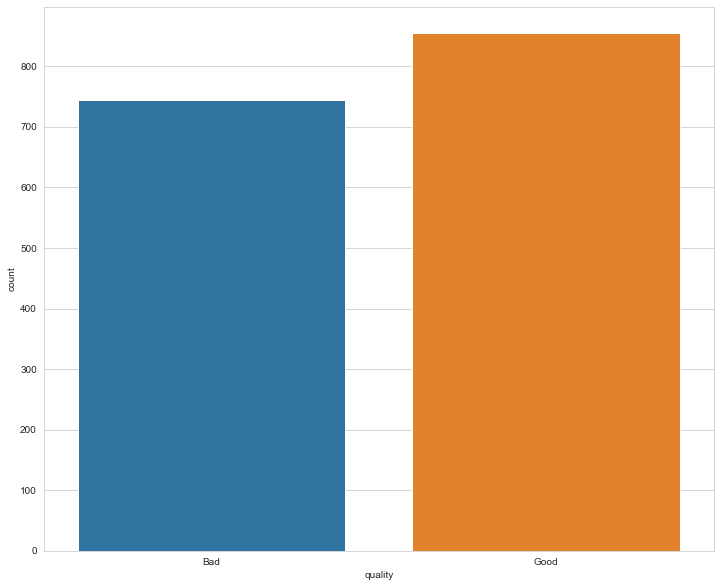

In [8]:
plt.figure(figsize = (12,10))
sns.set_style("whitegrid")
sns.countplot(x = "quality", data = df)

Now having completed the data split we see that there's only two groups instead of 6 and there is much more of a balance in the data compared to before. There are more observations it seems in the "Good" quality group but it doesn't appear to be a huge difference and thus is unlikely to have any significant impact on the classification performance in [Section 5](#ClassMethods)

In [29]:
# Encode the labels as 0 & 1 for "Bad" and "Good" class respectively

label_qual = LabelEncoder()

df["quality"] = label_qual.fit_transform(df["quality"])

<a id = "TrainTest"></a>
## <u>4.2 - Training & Test Data Split</u>

The final step before fitting our classifiers to the data is to split the data into 2 datasets:

<u>1. Training Data </u>

Contains data used to model the data and tune the parameters of each classification model we fit

<u>2. Test Data </u> 

Only used strictly for evaluating the performance of the classification models

In [30]:
# Create X and y arrays
X = df[["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
       "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
       "pH", "sulphates", "alcohol"]]

y = df["quality"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   random_state = 98)

<a id = "ClassMethods"></a>
# <u>5. Classification Methods</u>

<a id = "LogReg"></a>
## <u>5.1 - Logistic Regression</u>

The first classifier we'll be fitting to the data is a Logistic Regression classifier. We use a Logistic Regression model when we're looking to predict categorical classes - in this case 0 & 1 - that is, when the response or outcome variable isn't normally distributed.

Before implementing the classifier, we need to standardise the variables as without doing so leads to an error being displayed due to a lack of convergence which could likely be caused by potential outliers still in the data. 

In [32]:
scaler = RobustScaler()
scaler.fit(X_train)
scaler.fit(X_test)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Create an instance
LogReg_Model = LogisticRegression()


# Fit model to training data
LogReg_Model.fit(X_train, y_train)


# Predict on the test set
LogReg_Predicts = LogReg_Model.predict(X_test)

In [35]:
LogReg_Accuracy = accuracy_score(y_test, LogReg_Predicts)

In [34]:
print(confusion_matrix(y_test, LogReg_Predicts))
"\n"
print(classification_report(y_test, LogReg_Predicts))

[[165  74]
 [ 60 181]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       239
           1       0.71      0.75      0.73       241

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480



From the confusion matrix and classification report above, we would say the Logistic Regression classifier performed somewhat ok by correctly classifying 346 observations out of 480 in total. This gives an accuracy score of 72% which we would certainly like to be higher. 

<a id = "KNN"></a>
## <u>5.2 - K-Nearest Neighbours</u>

The second classification method we'll be considering in this analysis is K-Nearest Neighbours. The aim for this classifier is to take each wine observation ___i___ in turn and look at the ___k___ nearest observations to it. We then predict the class of observation ___i___ to be the class that the majority of it's ___k___ nearest neighbours share.

Standardisation of variables is very important for this classifier because if we have variables that are on a much larger scale compared to others, then those variables will have a greater effect on the distances between observations than those on a smaller scale but given we already standardised the variables above, we don't need to be concerned.

An important question to ask for the K-Nearest Neighbours classifier is what value of k should we use? But in order to find the optimal k value, we can loop through various values of k, store the accuracy score of each and then choose the one with the greatest accuracy.

In [36]:
# Empty list to store accuracy scores for values of k
k_accuracy_score = []

# Create loop from k = 1 to k = 30
for i in range(1, 31):
    
    # creates instance of classifier for k = i
    knn = KNeighborsClassifier(n_neighbors = i)
    
    # fits KNN algorithm to training data for each k
    knn.fit(X_train, y_train)
    
    # Predicts on test set
    Predicts_i = knn.predict(X_test)
    
    # Adds the accuracy score for k = i into empty list created
    k_accuracy_score.append(accuracy_score(Predicts_i, y_test))

Now that we've fitted our algorithm for multiple values of k, we can visualise the accuracy score for each value of k in the line plot below

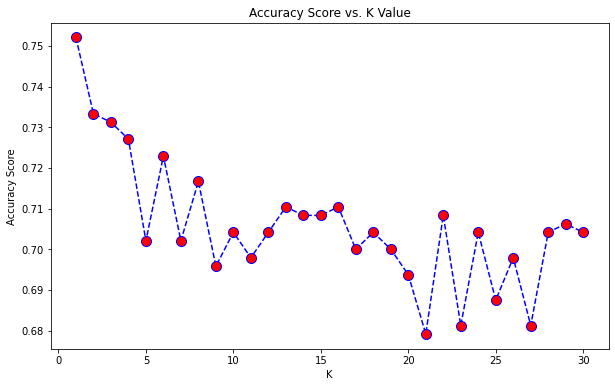

In [37]:
plt.figure(figsize=(10,6))

plt.plot(range(1, 31), k_accuracy_score,color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)

plt.title('Accuracy Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Score');

As we can see, it appears that the value of k = 1 actually has the best accuracy score so we re-apply the algorithm with k = 1 to get its overall performance

In [38]:
knn = KNeighborsClassifier(n_neighbors = 1)
    
knn.fit(X_train, y_train)
    
knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test, knn_pred))
"\n"
print(classification_report(y_test, knn_pred))

[[172  67]
 [ 52 189]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       239
           1       0.74      0.78      0.76       241

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480



The confusion matrix above demonstrates that the classifier correctly classified 361 out of 480 observations with an accuracy score of 75% which, similarly to the Logistic Regression classifier is an ok performance but one which we'd certainly like to be higher

<a id = "RFor"></a>
## <u>5.3 - Random Forest</u>

The third and final classifier for this analysis is the Random Forest classifier. This classifier is known as an ensemble classifier in that it builds multiple decision tree classifiers and merges them together giving an overall more accurate and stable prediction

In [39]:
# Create an instance of the classifier with 2000 trees
RFor = RandomForestClassifier(n_estimators = 2000)

# Fit to training data
RFor.fit(X_train, y_train)

# Predict on Test set
RFor_Predicts = RFor.predict(X_test)

In [40]:
# Accuracy score
RFor_Accuracy = accuracy_score(RFor_Predicts, y_test)

In [41]:
print(confusion_matrix(RFor_Predicts, y_test))
"\n"
print(classification_report(RFor_Predicts, y_test))

[[186  51]
 [ 53 190]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       237
           1       0.79      0.78      0.79       243

    accuracy                           0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.78      0.78      0.78       480



As we can see, with this classifier 376 out of 480 observations were correctly classified with an overall accuracy of 78% which is an overall ok performance.

<a id = "conc"></a>
# <u>6. Conclusion</u>

Overall from our analysis, it does appear that wine quality can be predicted to an extent by physicochemical variables. The plots in [Section 3.2](#BA) demonstrated that as wine quality increased, the levels of citric acid, sulphates and alcohol also increased steadily. Similarly, for increasing quality of wine, we saw associated decreases in the levels of volatile acidity, chlorides, pH and density with the average quality wines containing the highest levels of free & total sulfur dioxide.

Three different classification models were fitted during the analysis and the table below shows the overall performance of them,

In [43]:
pd.DataFrame({"Classification Method" : ["Logistic Regression", "K-Nearest Neighbours", "Random Forest"],
             "Accuracy Score": [LogReg_Accuracy, k_accuracy_score[0], RFor_Accuracy]}).set_index("Classification Method")

,Accuracy Score
Classification Method,
Logistic Regression,0.720833
K-Nearest Neighbours,0.752083
Random Forest,0.783333


As was mentioned after each classifier and can be seen from the above table, the performances weren't spectacular and left a lot to be desired for any future analysis on these data. The Random Forest classifier overall performed the best of the three with an accuracy score of 78.3% which is what we'd expect to see given it combines 2000 decision tree classifiers and so will typcially provide an overall more accurate prediction performance.

Improvements could be made to the analysis in future through various ways, firstly in [Section 3.1](#UA) instead of only applying a Box-Cox transformation to the skewed variables in the dataset, we could have removed those observations that were outliers via a method such as the Z-score method or IQR method and then applied the transformation and that may have eliminated the deviations we seen even after the transformation had been applied. Secondly, we could have also re-balanced the groups as mentioned in [Section 4.1](#GpSplit) either by undersampling the quality groups 5 & 6 or oversampling the other 4 groups. This may have then improved the classifiers' performances since they are likely to predict observations to belong to those classes that contain more observations.